<a href="https://colab.research.google.com/github/Aminegh16/test/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GHAZI MOHAMED AMINE 115476**

**TIFAF ZAID 115354**

# **Introduction to Computer Vision - Homework**
**Objective**

The primary objective of this homework is to develop and train a Convolutional Neural Network (CNN) for a binary classification task using the CIFAR10 dataset. The task involves classifying objects into two categories:

*   **Can Fly (class 1):**  This category includes objects that have the ability to fly, specifically birds and airplanes.
*   **Cannot Fly (class 0):**  This category encompasses all other objects in the dataset, such as frogs, deer, trucks, etc.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

**Dataset Overview**

The CIFAR10 dataset is a widely used benchmark in the field of computer vision, consisting of 60,000 32x32 color images in 10 different classes. Each class contains 6,000 images. For this homework, we will re-categorize these classes into two broader categories based on their ability to fly.

In [ ]:

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Step 2: Data Preparation
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_dict = dict(zip(range(10), labels))
# Map labels to binary classes
fly_classes = [0, 2]  # airplane and bird
y_train_binary = np.isin(y_train, fly_classes).astype(int)
y_test_binary = np.isin(y_test, fly_classes).astype(int)

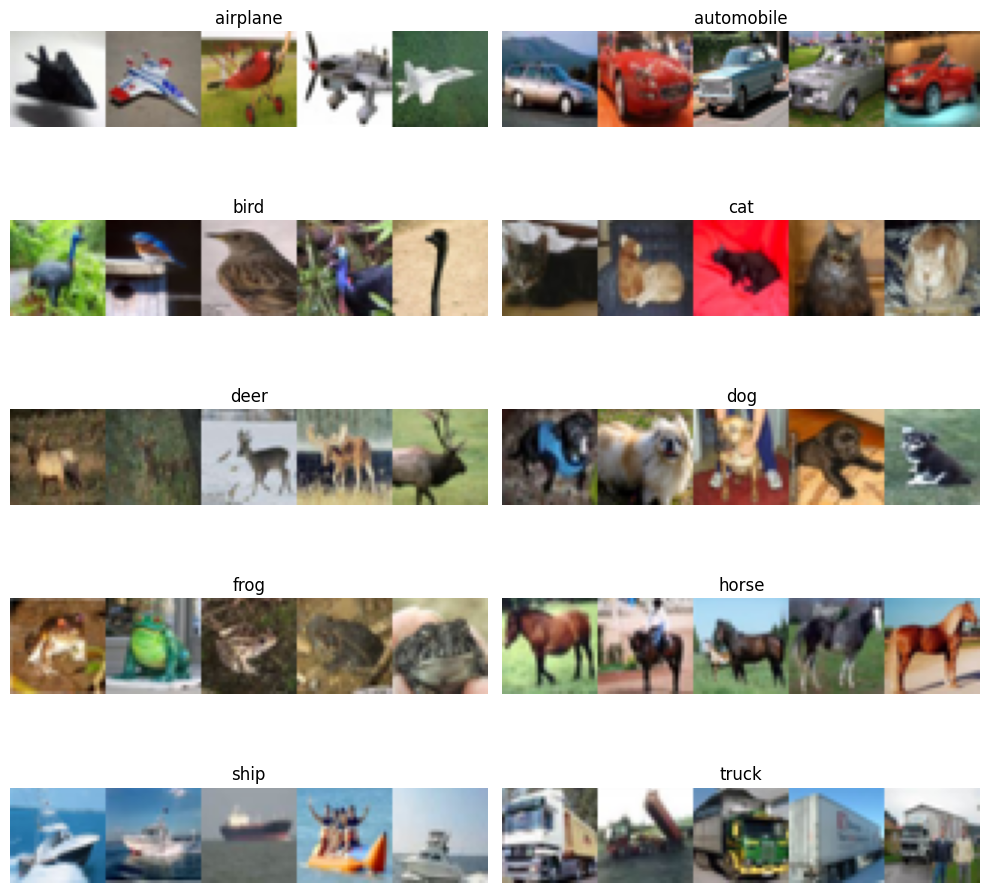

In [ ]:
#  Visualize the data
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.argwhere(y_train.flatten() == i).flatten()
    idx = list(idx[:5])  # Plot fewer images to reduce plot size
    imgs = np.hstack(x_train[idx])
    plt.subplot(5, 2, i + 1)  # Adjusted to fit in a 5x2 grid
    plt.imshow(imgs)
    plt.title(labels_dict[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

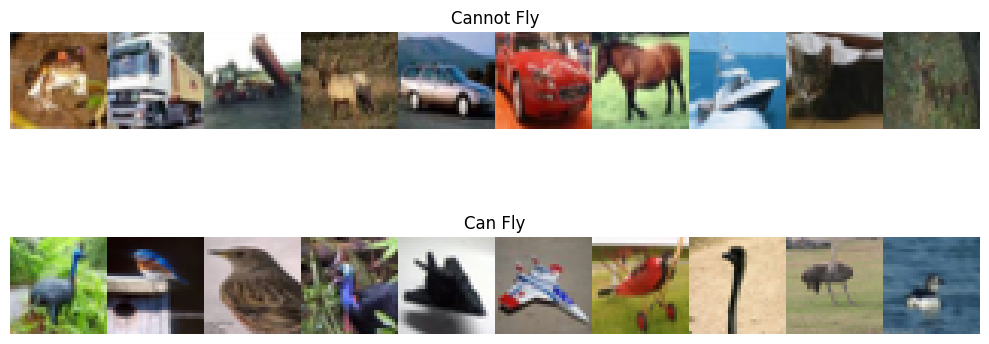

In [ ]:
# Visualize images that can fly and cannot fly
fly_labels = {1: "Can Fly", 0: "Cannot Fly"}
plt.figure(figsize=(10, 5))
for class_value in [0, 1]:
    idx = np.argwhere(y_train_binary.flatten() == class_value).flatten()
    idx = list(idx[:10])
    imgs = np.hstack(x_train[idx])
    plt.subplot(2, 1, class_value + 1)
    plt.imshow(imgs)
    plt.title(fly_labels[class_value])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(y_test_binary,y_train_binary)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]] [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
# The CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

**Why This Architecture?**

**Effective Feature Extraction**: Convolutional layers combined with max pooling layers effectively extract hierarchical features from images, starting from low-level features like edges to high-level features like object parts.
Non-linearity: ReLU activations introduce non-linearity, enabling the network to learn more complex patterns.

**Dimensionality Reduction:** Max pooling layers help reduce the spatial dimensions, making the computation more efficient and reducing the risk of overfitting.

**Overfitting Control:** Dropout layers help in regularizing the model, preventing it from overfitting to the training data.
Binary Classification: The final dense layer with a sigmoid activation function is tailored for binary classification, outputting a probability that the input image belongs to the "can fly" class.

This architecture is a balance between simplicity and effectiveness, making it well-suited for the CIFAR10 dataset and the specific binary classification task at hand.

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Loss Function (loss='binary_crossentropy') :** Since this is a binary classification task (can fly or cannot fly), binary cross-entropy is an appropriate loss function. It measures the difference between the predicted probabilities and the true binary labels.

**Metrics (metrics=['accuracy']) :** During training and evaluation, we want to monitor the accuracy of our model. This metric tells us the percentage of correctly classified instances out of the total instances.

**model.summary() :**  display a summary of the model architecture, including information about each layer, the output shape, and the number of parameters.

In [ ]:
# Train the Model
history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test, y_test_binary))

Epoch 1/10
1563/1563 [==============================] - 78s 48ms/step - loss: 0.5106 - accuracy: 0.8038 - val_loss: 0.4284 - val_accuracy: 0.8248
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4047 - accuracy: 0.8302 - val_loss: 0.3612 - val_accuracy: 0.8496
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.3700 - accuracy: 0.8492 - val_loss: 0.3323 - val_accuracy: 0.8590
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3524 - accuracy: 0.8575 - val_loss: 0.3442 - val_accuracy: 0.8509
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3318 - accuracy: 0.8650 - val_loss: 0.3145 - val_accuracy: 0.8729
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3170 - accuracy: 0.8729 - val_loss: 0.3610 - val_accuracy: 0.8524
Epoch 7/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.2981 - accuracy: 0.8815 - val_loss: 0.3063 -

Training the model involves fitting it to the training data and validating it on the testing data. Here's what each argument in the **fit()** method signifies:

**Training Data (x_train, y_train_binary):** The input features (x_train) and binary labels (y_train_binary) used for training the model.

**Number of Epochs (epochs=10):** An epoch represents one complete pass through the entire training dataset. Training for multiple epochs allows the model to learn from the data multiple times.

**Validation Data (validation_data=(x_test, y_test_binary)):** During training, the model's performance is evaluated on a separate validation dataset (here, the testing data) to monitor its generalization ability and detect overfitting.

After training, the **fit()** method returns a **history** object containing information about the training process, such as the loss and accuracy metrics recorded during each epoch.

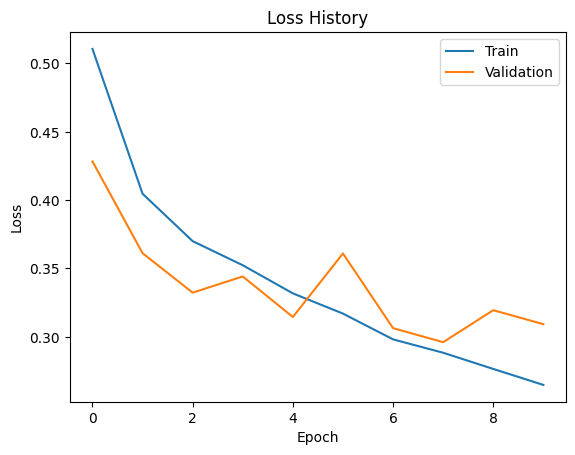

In [ ]:
# Evaluate the Model
def plot_loss(history):
    """
    history: history object returned by keras fit method
    """
    plt.figure()
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.show()
plot_loss(history)

In [ ]:

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)
accuracy = accuracy_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)

313/313 [==============================] - 9s 29ms/step


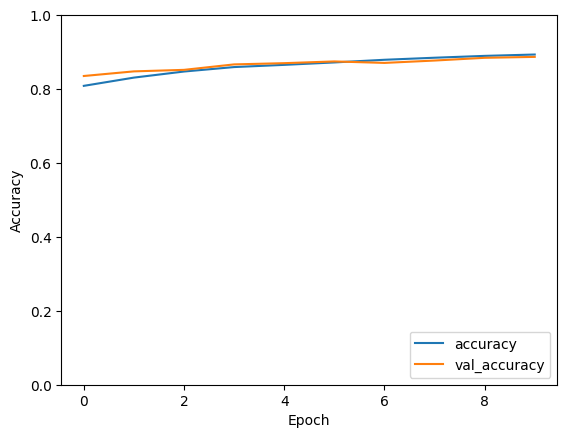

Precision:  0.8203240058910162
Recall:  0.557
F1 Score:  0.6634901727218582
Accuracy:  0.887
Confusion Matrix:
 [[7756  244]
 [ 886 1114]]


In [ ]:
# Step 7: Visualize and Report Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)

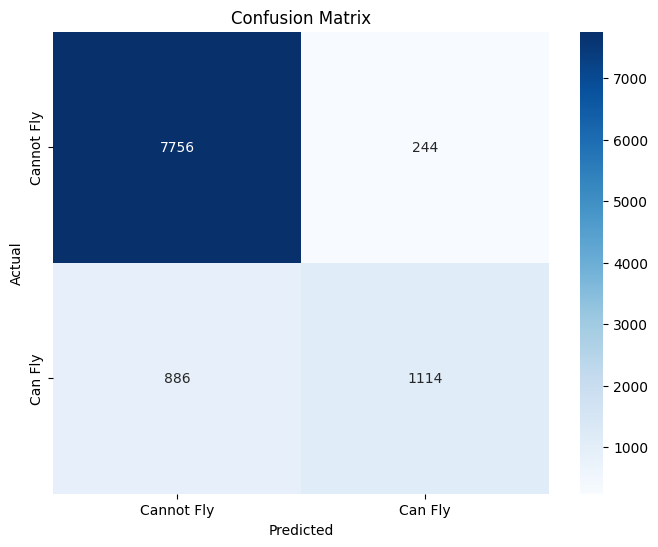

In [ ]:
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()